In [4]:
import matplotlib.pyplot as plt
import rasterio
import spectral
import numpy as np

In [2]:
# Load an image

img_src = 'E:/01 DeepHS-Fruit-2023-Datasets/papaya_day_m4_03_01_back.bin'
#img_src = 'p1.tiff'
#img_src = '19920612_AVIRIS_IndianPine_EW-line_R.tif'
#img_src = '19920612_AVIRIS_IndianPine_Site3.tif'
#img_src = 'MA1_L1.tif'
#img_src = '1_1HG.bil'
#img_src = 'peslady84.tif'
#img_src = 'MA1_H1.bil'

#original_img = plt.imread(img_src)

#plt.imshow(original_img)
#print("Shape of original_img is:", original_img.shape)

In [3]:
#Showing metadata of image
with rasterio.open(img_src) as src:

    print(src.meta)
    print(src.tags())
    
    print(f"Number of bands: {src.count}")

{'driver': 'ENVI', 'dtype': 'float32', 'nodata': None, 'width': 258, 'height': 431, 'count': 224, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
{}
Number of bands: 224


c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


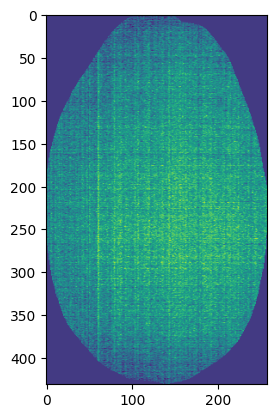

In [4]:
#Visualizing different bands in RGB

with rasterio.open(img_src) as src:
    
    band1 = src.read(1)  # band no.

plt.imshow(band1, cmap='viridis')
plt.show()

In [5]:
# Open the .bil file
with rasterio.open(img_src) as dataset:
    
    # Read all bands into a 3D NumPy array (bands, rows, cols)
    data = dataset.read()  # Reads all bands


# Now 'data' is a 3D NumPy array: (bands, rows, cols)
print(f"Shape of the data (bands, rows, cols): {data.shape}\n")

# Example: To access the first band
first_band = data[1]
print(first_band)

Shape of the data (bands, rows, cols): (224, 431, 258)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Load hyperspectral data
dat_file = 'E:/Unzipped/HSI_Butterfly_Species/datacube/AO/cube 2/espece7_acq11.dat'
hdr_file = 'E:/Unzipped/HSI_Butterfly_Species/datacube/AO/cube 2/espece7_acq11.dat.hdr'

cube = spectral.open_image(hdr_file)

print(cube.shape)

(333, 517, 192)


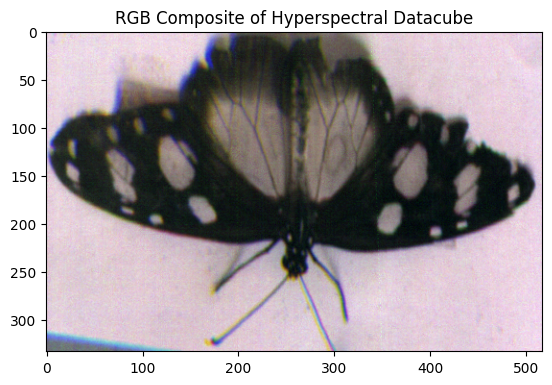

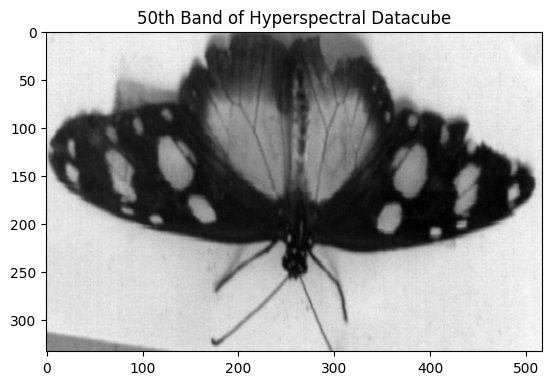

In [9]:
# Show an RGB composite (using 3 bands)
rgb = spectral.get_rgb(cube, [30, 20, 10])  # Choose bands for R, G, B
plt.imshow(rgb)
plt.title("RGB Composite of Hyperspectral Datacube")
plt.show()

# Visualize individual bands
plt.imshow(cube[:, :, 50], cmap='gray')  # Visualize 50th band
plt.title("50th Band of Hyperspectral Datacube")
#plt.colorbar()
plt.show()

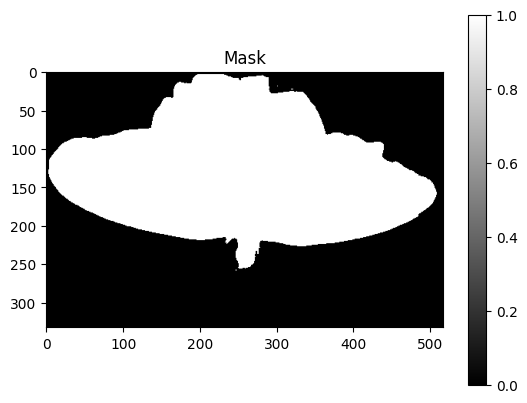

In [5]:
# Load mask
mask_file = 'E:/Unzipped/HSI_Butterfly_Species/datacube/AO/cube 2/espece7_acq11_mask.npy'
mask = np.load(mask_file)

# Visualize mask
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.colorbar()
plt.show()